In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report


In [72]:
## Read in the data 
data_1 = pd.read_csv("1_raw_data_13-12_22.03.16.txt" , sep = "\t")
data_2 = pd.read_csv("2_raw_data_13-13_22.03.16.txt" , sep = "\t")

In [73]:
data_1.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


In [74]:
data_2.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,2,-0.00001,-0.00004,-0.00002,-0.00002,-0.00001,-0.00001,0.00001,-0.00003,0
1,6,-0.00001,-0.00004,-0.00002,-0.00002,-0.00001,-0.00001,0.00001,-0.00003,0
2,7,-0.00001,-0.00004,-0.00002,-0.00002,-0.00001,-0.00001,0.00001,-0.00003,0
3,8,-0.00003,-0.00005,-0.00008,-0.00004,-0.00003,0.00000,-0.00002,0.00000,0
4,9,-0.00003,-0.00001,0.00000,0.00001,-0.00001,0.00000,0.00000,-0.00002,0


In [75]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63196 entries, 0 to 63195
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      63196 non-null  int64  
 1   channel1  63196 non-null  float64
 2   channel2  63196 non-null  float64
 3   channel3  63196 non-null  float64
 4   channel4  63196 non-null  float64
 5   channel5  63196 non-null  float64
 6   channel6  63196 non-null  float64
 7   channel7  63196 non-null  float64
 8   channel8  63196 non-null  float64
 9   class     63196 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 4.8 MB


In [76]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57974 entries, 0 to 57973
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      57974 non-null  int64  
 1   channel1  57974 non-null  float64
 2   channel2  57974 non-null  float64
 3   channel3  57974 non-null  float64
 4   channel4  57974 non-null  float64
 5   channel5  57974 non-null  float64
 6   channel6  57974 non-null  float64
 7   channel7  57974 non-null  float64
 8   channel8  57974 non-null  float64
 9   class     57974 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 4.4 MB


In [77]:
data_1['class'].value_counts()

0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: class, dtype: int64

In [78]:
data_2['class'].value_counts()

0    37410
1     3531
3     3513
5     3460
6     3396
4     3383
2     3281
Name: class, dtype: int64

In [79]:
37410/data_2.shape[0]

0.6452892676027184

In [80]:
data_1.isnull().sum()

time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
dtype: int64

In [81]:
## Merge the two files. 
total_data_1 = pd.concat([data_1, data_2])

In [82]:
print(total_data_1.head())

print("\ntotal no of records in the file {}:".format(total_data_1.shape[0]))


   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  
0  -0.00001      0  
1  -0.00001      0  
2   0.00001      0  
3   0.00001      0  
4   0.00001      0  

total no of records in the file 121170:


In [83]:
total_data_1['class'].value_counts()

0    78682
3     7329
1     7311
6     7143
5     7075
4     6824
2     6806
Name: class, dtype: int64

In [84]:
78682/ total_data_1.shape[0]

0.6493521498720806

In [85]:
## Drop the labels that are not marked .

total_data = total_data_1[total_data_1['class'] != 0]
total_data.shape

(42488, 10)

### Feature Scaling

In [86]:
## Use 'train_test_split' function to split data  into train and test 

target = total_data['class']
predictors = total_data.drop(['time','class'], axis = 1)

x_train,x_test,y_train,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.2,stratify = target)

print("X_train :" + str(x_train.shape))
print("X_train index nos:" + str(x_train.index))
print("X_test :" + str(x_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))
   

X_train :(33990, 8)
X_train index nos:Int64Index([34002, 18341, 34582,  6648, 18862, 13638, 16719, 16247, 13219,
            14338,
            ...
             5895, 43085, 34833, 18988, 16100, 55987, 25874, 61395, 34265,
            55290],
           dtype='int64', length=33990)
X_test :(8498, 8)
y_train :(33990,)
y_test :(8498,)


In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [88]:
evalset = [(x_train, y_train), (x_test,y_test)]

In [89]:
# Mean Squared Error (MSE)
def mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

# Root Mean Squared Error (RMSE)
def rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return rmse

# Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def mape(y_true, y_pred):
    non_zero_indices = y_true != 0  # Exclude zero values
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    return mape

### Random Forest Classifier

In [90]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)

In [91]:
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [92]:
y_pred = model_RF.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy for RF: %.2f%%" % (accuracy_rf * 100.00))

Accuracy for RF: 98.61%


In [93]:
y_true = np.array(y_test)

In [94]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [95]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [96]:
results = pd.DataFrame(pd.DataFrame([['Random Forest', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [97]:
results

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,Random Forest,0.986114,0.986058,0.98608,0.986058,0.092728,0.304512,0.032478,1.992136


In [98]:
cm_rf = confusion_matrix(y_true, y_pred)

In [99]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1462
           1       0.99      0.98      0.99      1361
           2       0.98      0.98      0.98      1466
           3       0.98      0.99      0.98      1365
           4       0.99      0.98      0.98      1415
           5       0.98      0.98      0.98      1429

    accuracy                           0.99      8498
   macro avg       0.99      0.99      0.99      8498
weighted avg       0.99      0.99      0.99      8498



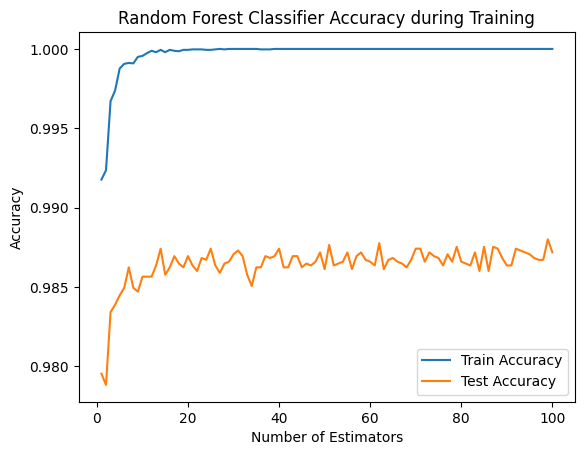

In [100]:
# Plot the accuracy graph
n_estimators = range(1, 101)  # Number of estimators to plot
train_accuracy = []
test_accuracy = []

for n in n_estimators:
    model_rf = RandomForestClassifier(n_estimators=n)
    model_rf.fit(x_train, y_train)
    y_train_pred = model_rf.predict(x_train)
    y_test_pred = model_rf.predict(x_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(n_estimators, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy during Training')
plt.legend()
plt.show()

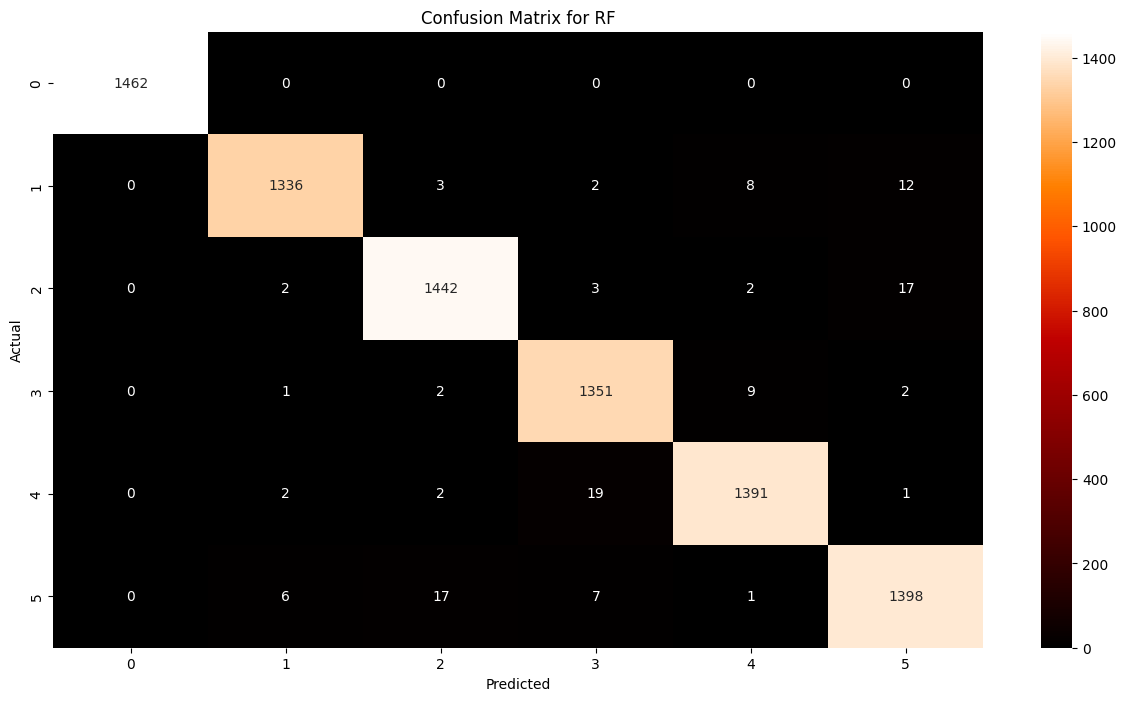

In [101]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF")
plt.show()

### KNN Classifier

In [102]:
# Create the KNN classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

In [103]:
# Fit the classifier to the training data
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [104]:
# Predict the labels of the test data
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy for KNN: %.2f%%" % (accuracy_knn * 100.00))

Accuracy for KNN: 97.68%


In [105]:
y_true = np.array(y_test)

In [106]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [107]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [108]:
results_knn = pd.DataFrame(pd.DataFrame([['KNN Classifier', acc, f1, prec, rec,mae_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [109]:
results_knn

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,KNN Classifier,0.976818,0.9767,0.976866,0.976636,0.050953,0.375309,0.050953,3.305856


In [110]:
results= results= pd.concat([results, results_knn], ignore_index= True)

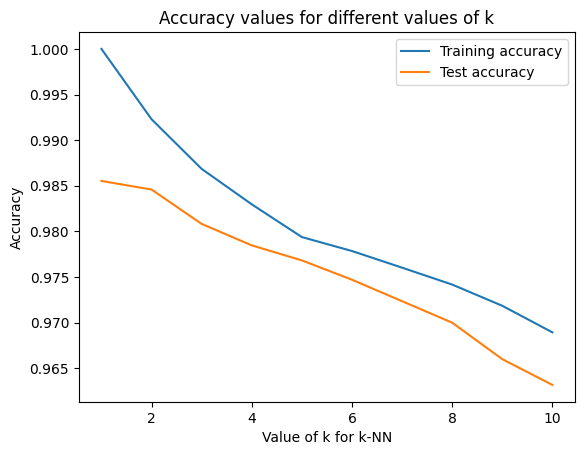

In [111]:
# Vary k from 1 to 10
k_values = range(1, 11)

# Calculate accuracy for each k on training and test sets
train_accuracies = []
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Calculate accuracy on training data
    y_train_pred = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate accuracy on test data
    y_test_pred = knn.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the accuracy values for each k on training and test sets
plt.plot(k_values, train_accuracies, label='Training accuracy')
plt.plot(k_values, test_accuracies, label='Test accuracy')
plt.xlabel('Value of k for k-NN')
plt.ylabel('Accuracy')
plt.title('Accuracy values for different values of k')
plt.legend()
plt.show()

In [112]:
cm_knn  = confusion_matrix(y_true,y_pred)

In [113]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1462
           1       0.99      0.96      0.98      1361
           2       0.97      0.97      0.97      1466
           3       0.96      0.98      0.97      1365
           4       0.98      0.98      0.98      1415
           5       0.97      0.97      0.97      1429

    accuracy                           0.98      8498
   macro avg       0.98      0.98      0.98      8498
weighted avg       0.98      0.98      0.98      8498



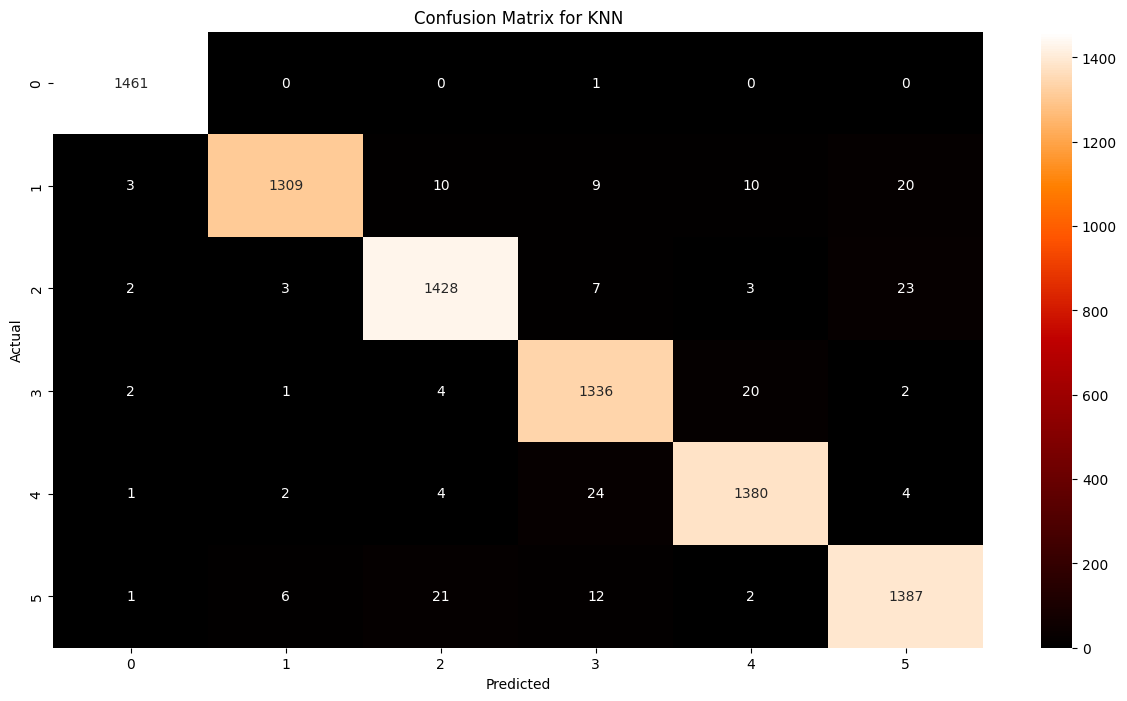

In [114]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")
plt.show()

### XGB Classifier

In [115]:
model_XGB = xgb.XGBClassifier()

In [116]:
model_XGB.fit(x_train, y_train, eval_metric='merror', eval_set=evalset, verbose=False)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [117]:
y_pred = model_XGB.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy for XGB: %.2f%%" % (accuracy_xgb * 100.00))

Accuracy for XGB: 98.69%


In [118]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [119]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [120]:
result_xgb = pd.DataFrame(pd.DataFrame([['XGB Classifier', acc, f1, prec, rec, mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [121]:
result_xgb

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,XGB Classifier,0.986938,0.986871,0.986897,0.98687,0.087197,0.295291,0.030242,1.969632


In [122]:
results= pd.concat([results, result_xgb], ignore_index= True)

In [123]:
accuracy_results = model_XGB.evals_result()
train_accuracy = accuracy_results['validation_0']['merror']
test_accuracy = accuracy_results['validation_1']['merror']

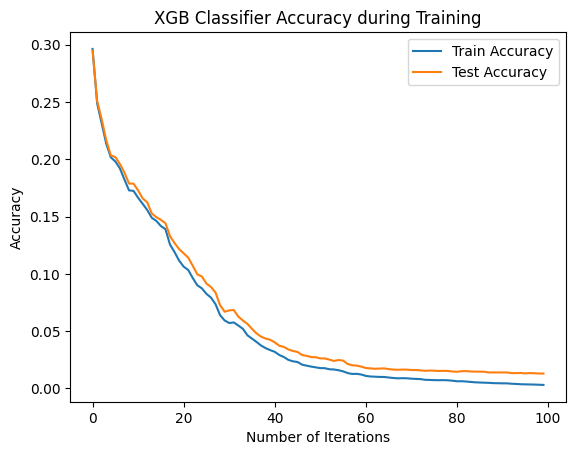

In [124]:
# Plot the accuracy graph
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('XGB Classifier Accuracy during Training')
plt.legend()
plt.show()

In [125]:
cm_xgb = confusion_matrix(y_true, y_pred)

In [126]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1462
           1       0.99      0.98      0.99      1361
           2       0.99      0.98      0.99      1466
           3       0.98      0.99      0.98      1365
           4       0.99      0.99      0.99      1415
           5       0.98      0.98      0.98      1429

    accuracy                           0.99      8498
   macro avg       0.99      0.99      0.99      8498
weighted avg       0.99      0.99      0.99      8498



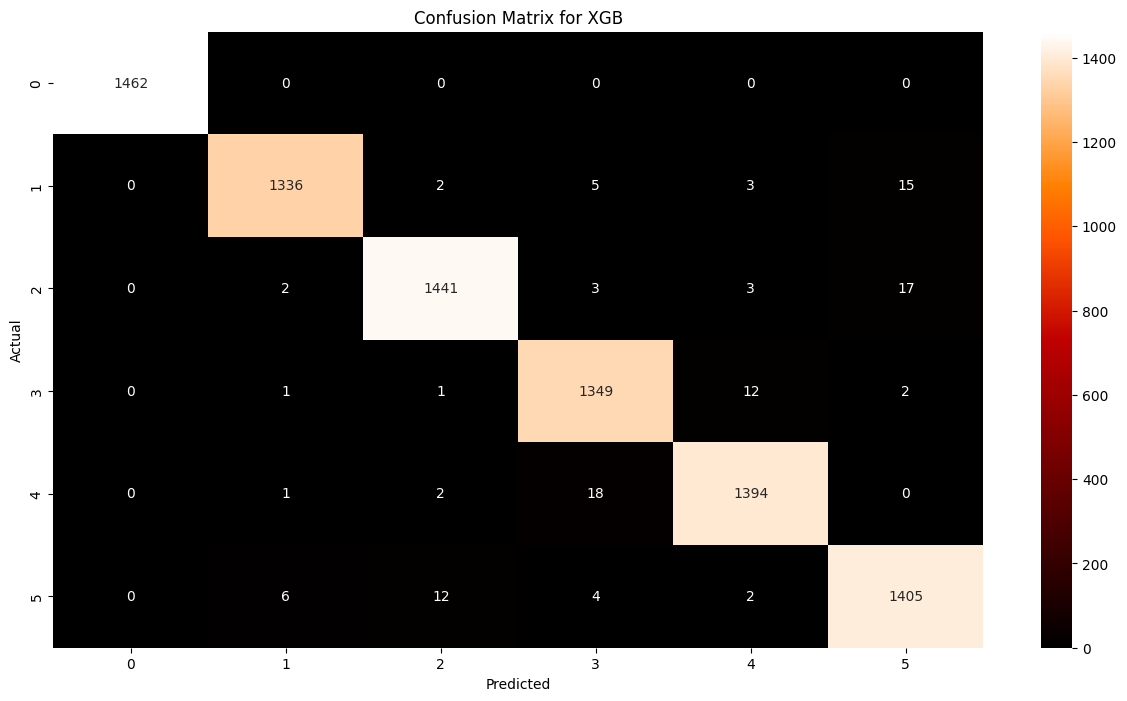

In [127]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGB")
plt.show()

### GNB CLassifier

In [128]:
model_GNB = GaussianNB()

In [129]:
model_GNB.fit(x_train, y_train)

GaussianNB()

In [130]:
y_pred = model_GNB.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred)
print("Accuracy for GNB: %.2f%%" % (accuracy_gnb * 100.00))

Accuracy for GNB: 62.77%


In [131]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
prec = precision_score(y_test,y_pred,average='micro')
rec = recall_score(y_test,y_pred,average='micro')

In [132]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [133]:
results_gnb = pd.DataFrame(pd.DataFrame([['GNB Classifier', acc, f1, prec, rec, mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [134]:
results_gnb

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,GNB Classifier,0.627677,0.627677,0.627677,0.627677,2.194046,1.481231,0.811367,46.431448


In [135]:
results= pd.concat([results, results_gnb], ignore_index= True)

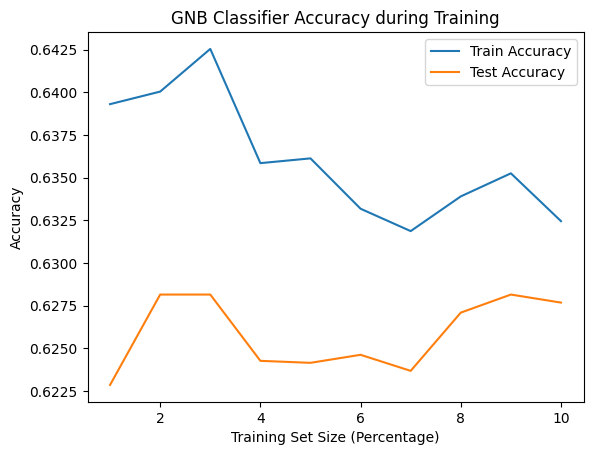

In [136]:
# Plot the accuracy graph
train_accuracy = []
test_accuracy = []

# Train the model with different training set sizes
for i in range(1, 11):
    train_size = int(len(x_train) * (i / 10))
    x_train_subset = x_train[:train_size]
    y_train_subset = y_train[:train_size]
    model_GNB.fit(x_train_subset, y_train_subset)
    y_train_pred = model_GNB.predict(x_train_subset)
    y_test_pred = model_GNB.predict(x_test)
    train_accuracy.append(accuracy_score(y_train_subset, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(range(1, 11), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracy, label='Test Accuracy')
plt.xlabel('Training Set Size (Percentage)')
plt.ylabel('Accuracy')
plt.title('GNB Classifier Accuracy during Training')
plt.legend()
plt.show()

In [137]:
cm_gnb = confusion_matrix(y_true, y_pred)

In [138]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1462
           1       0.73      0.48      0.58      1361
           2       0.51      0.74      0.60      1466
           3       0.52      0.55      0.53      1365
           4       0.55      0.56      0.56      1415
           5       0.53      0.43      0.47      1429

    accuracy                           0.63      8498
   macro avg       0.64      0.62      0.62      8498
weighted avg       0.64      0.63      0.63      8498



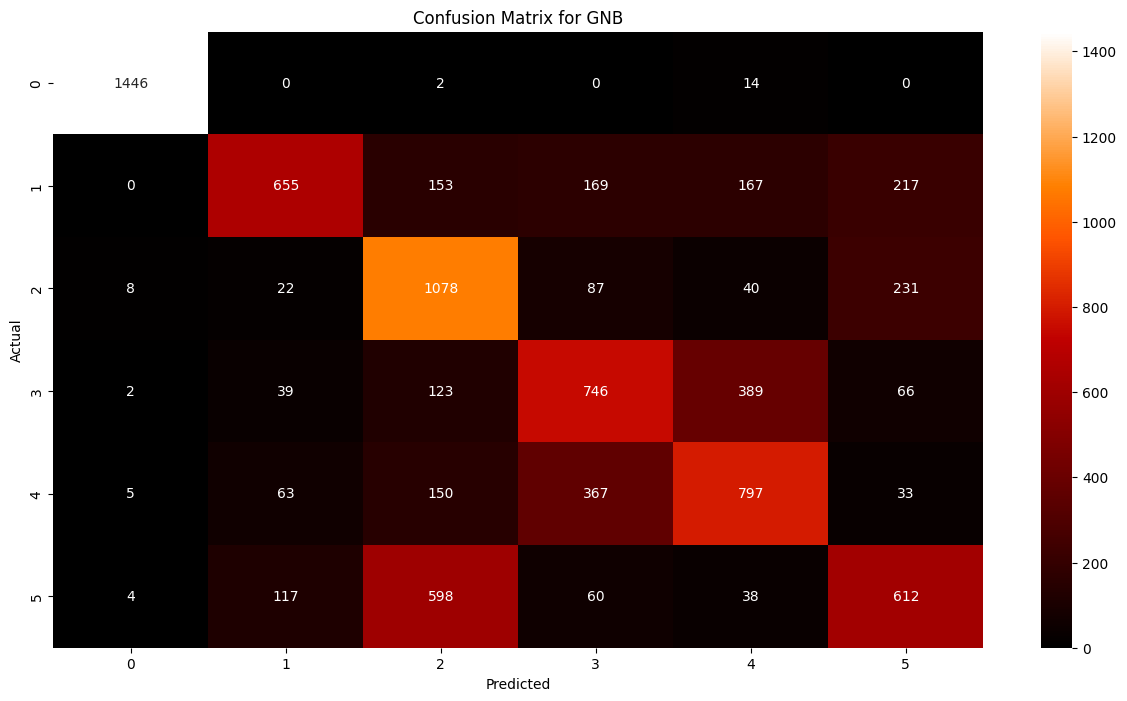

In [139]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_gnb, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GNB")
plt.show()

In [140]:
results

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,Random Forest,0.986114,0.986058,0.986080,0.986058,0.092728,0.304512,0.032478,1.992136
1,KNN Classifier,0.976818,0.976700,0.976866,0.976636,0.050953,0.375309,0.050953,3.305856
2,XGB Classifier,0.986938,0.986871,0.986897,0.986870,0.087197,0.295291,0.030242,1.969632
3,GNB Classifier,0.627677,0.627677,0.627677,0.627677,2.194046,1.481231,0.811367,46.431448
